>>[Dataset Description](#scrollTo=0lGO-OJgmCar)

>>>[Setup Steps:](#scrollTo=BNLA8HiKxQhc)

>>>[Import required packages](#scrollTo=7HLNGs_bmHvF)

>>>[Load Dataset](#scrollTo=JbSh_Jq2oWY1)

>>[Data Preprocessing](#scrollTo=E4dwETB2_8Nl)

>>>[Handling NULL values in the dataset](#scrollTo=zlFPKYZucnF4)

>>>>[Removing samples(rows) having high NULL values - Horizontal](#scrollTo=2-dDxWtkMk9l)

>>>[Fetaure( Column) wise data analysis](#scrollTo=OjIX4nb0haL4)

>>>>[Removing columns having null values more than 40%](#scrollTo=liBwKqkZoqIR)

>>>>[Dealing with categorical values](#scrollTo=KJzVNT2ao7-j)

>>>>>[Column 16](#scrollTo=rzl4dk6Mzw0R)

>>>>>[Checking for 'Object' features](#scrollTo=YEiMZiaZTdrx)

>>>>[Further data analysis on specific feature - Outliers handling](#scrollTo=-Lol-fG96tXl)

>>>>>[Column2](#scrollTo=_zJMj0D4q_dr)

>>>>>[Column5](#scrollTo=nol3ePg9rFQC)

>>>>>[Column8](#scrollTo=cdE-3FhFrLLQ)

>>>>>[Column15](#scrollTo=nKO-57v1sUNU)

>>>>>[Column17](#scrollTo=pChS5Uzttxre)

>>>>[Handling Null values in reduced dataset](#scrollTo=BOe_jJNepdO0)

>>[Model Building](#scrollTo=s_hu29-spmU9)

>>>[Split data into training and testing set](#scrollTo=1y50b4jgbIz8)

>>>>[Test Data](#scrollTo=is4AIyZq4API)

>>>>[Validation Data](#scrollTo=FQJRO3qQ4FML)

>>>>[Metrics Utility](#scrollTo=z-zlSIj0fHVi)

>>>[Decision Tree](#scrollTo=_VbDY8jie6bk)

>>>[Random Forest](#scrollTo=SxTjhqqcni8K)

>>>[CatBoost](#scrollTo=rt5YFRSCdno1)

>>>[XGBoost](#scrollTo=ObSCMRsW3paH)

>>>[LightGBM](#scrollTo=x5Qr8gng6jLW)

>>[Model Selection](#scrollTo=JrsAOcO1nvNv)



## Dataset Description


### Setup Steps:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/GST/Train_60.zip -d /content/GST

Archive:  /content/drive/MyDrive/GST/Train_60.zip
   creating: /content/GST/Train_60/
   creating: /content/GST/Train_60/__MACOSX/
  inflating: /content/GST/Train_60/__MACOSX/._Train_60  
   creating: /content/GST/Train_60/__MACOSX/Train_60/
  inflating: /content/GST/Train_60/__MACOSX/Train_60/._X_Train_Data_Input.csv  
  inflating: /content/GST/Train_60/__MACOSX/Train_60/._Y_Train_Data_Target.csv  
  inflating: /content/GST/Train_60/__MACOSX/Train_60/._checksum.py  
  inflating: /content/GST/Train_60/__MACOSX/Train_60/._SHA_256.txt  
  inflating: /content/GST/Train_60/__MACOSX/Train_60/._Instructions.txt  
   creating: /content/GST/Train_60/Train_60/
  inflating: /content/GST/Train_60/Train_60/Instructions.txt  
  inflating: /content/GST/Train_60/Train_60/checksum.py  
  inflating: /content/GST/Train_60/Train_60/SHA_256.txt  
  inflating: /content/GST/Train_60/Train_60/Y_Train_Data_Target.csv  
  inflating: /content/GST/Train_60/Train_60/X_Train_Data_Input.csv  


In [3]:
!chmod 777 /content/GST/Train_60/Train_60/checksum.py
!python /content/GST/Train_60/Train_60/checksum.py /content/GST/Train_60/Train_60/X_Train_Data_Input.csv

SHA256 Checksum: 5e4871f01f3aa565aaee0fda58868046ff20c3e5d9084c3edc2c1f33ab97497b


In [4]:
# GST test data for validation
!unzip /content/drive/MyDrive/GST/Test_20.zip -d /content/GST
!python /content/GST/Test_20/Test_20/checksum.py /content/GST/Test_20/Test_20/X_Test_Data_Input.csv

Archive:  /content/drive/MyDrive/GST/Test_20.zip
   creating: /content/GST/Test_20/__MACOSX/
  inflating: /content/GST/Test_20/__MACOSX/._Test_20  
   creating: /content/GST/Test_20/__MACOSX/Test_20/
  inflating: /content/GST/Test_20/__MACOSX/Test_20/._checksum.py  
  inflating: /content/GST/Test_20/__MACOSX/Test_20/._Instructions.txt  
  inflating: /content/GST/Test_20/__MACOSX/Test_20/._SHA_256.txt  
  inflating: /content/GST/Test_20/__MACOSX/Test_20/._X_Test_Data_Input.csv  
  inflating: /content/GST/Test_20/__MACOSX/Test_20/._Y_Test_Data_Target.csv  
   creating: /content/GST/Test_20/Test_20/
  inflating: /content/GST/Test_20/Test_20/checksum.py  
  inflating: /content/GST/Test_20/Test_20/Instructions.txt  
  inflating: /content/GST/Test_20/Test_20/SHA_256.txt  
  inflating: /content/GST/Test_20/Test_20/X_Test_Data_Input.csv  
  inflating: /content/GST/Test_20/Test_20/Y_Test_Data_Target.csv  
SHA256 Checksum: 4def397cabaf0fee6bb34fc47a48d2056a2b33eabb62c32794b6cb96abee8b89


###  Import required packages

In [5]:
!pip -qq install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.6 MB/s eta 0:00:00


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, metrics, cv
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


### Load Dataset

In [7]:
# Configuration Parameters
TRAIN_DATASET_PATH = "/content/GST/Train_60/Train_60/X_Train_Data_Input.csv"
TRAIN_DATASET_TARGET_PATH = "/content/GST/Train_60/Train_60/Y_Train_Data_Target.csv"
TEST_DATASET_PATH = "/content/GST/Test_20/Test_20/X_Test_Data_Input.csv"
TEST_DATASET_TARGET_PATH = "/content/GST/Test_20/Test_20/Y_Test_Data_Target.csv"

In [8]:
# Load the raw loan stats dataset
data = pd.read_csv(TRAIN_DATASET_PATH)
data.shape


(785133, 23)

In [9]:
target = pd.read_csv(TRAIN_DATASET_TARGET_PATH)
target.shape

(785133, 2)

In [10]:
# Add target to data to simplify
data = pd.merge(data, target, on='ID')

## Data Preprocessing

In [11]:
# View the top 5 rows of data
data.head(5)

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
0,ad1a67e4cbddc767a3456b0d94299b9e,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,...,0,0.001351,0.00339,0.0,0,0.0,0,0,0,0
1,7246d2f76ac0c217ec25e72ea5f014cb,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,...,0,0.001351,0.00339,0.0,0,0.0,0,0,0,0
2,22ba388e7dd14c13342c49e75fc29dda,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,1,0.001351,0.00339,0.0,0,0.0,0,0,0,0
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,NaN,NaN,NaN,-0.407939,-0.015607,-0.774979,...,0,NaN,0.00339,0.0,0,1.0,0,0,0,1
4,f6317cf7ecf126859804eddff279aead,0.0,718,950.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,...,0,NaN,0.00339,0.0,0,0.0,0,0,0,0


In [12]:
# Checking info of the raw dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 24 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        785133 non-null  object 
 1   Column0   785124 non-null  float64
 2   Column1   785133 non-null  int64  
 3   Column2   785133 non-null  float64
 4   Column3   658830 non-null  float64
 5   Column4   657423 non-null  float64
 6   Column5   617953 non-null  float64
 7   Column6   781283 non-null  float64
 8   Column7   785133 non-null  float64
 9   Column8   781283 non-null  float64
 10  Column9   52996 non-null   float64
 11  Column10  785133 non-null  int64  
 12  Column11  785133 non-null  int64  
 13  Column12  785133 non-null  int64  
 14  Column13  785133 non-null  int64  
 15  Column14  419430 non-null  float64
 16  Column15  768677 non-null  float64
 17  Column16  785133 non-null  float64
 18  Column17  785133 non-null  int64  
 19  Column18  785133 non-null  float64
 20  Colu

### Handling NULL values in the dataset

In [13]:
# Check missing values
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({
                                 'counts' : data.isnull().sum(),
                                 'percent_missing': percent_missing})
missing_value_df

,counts,percent_missing
ID,0,0.000000
Column0,9,0.001146
Column1,0,0.000000
Column2,0,0.000000
Column3,126303,16.086829
Column4,127710,16.266034
Column5,167180,21.293208
Column6,3850,0.490363
Column7,0,0.000000
Column8,3850,0.490363


In [14]:
# Total percentage of null values in the data
pct = (data.isnull().sum().sum())/(data.shape[0]*data.shape[1])
print("Overall missing values in the data ≈ {:.2f} %".format(pct*100))

Overall missing values in the data ≈ 8.19 %


#### Removing samples(rows) having high NULL values - Horizontal

For this purpose threshold is defined as 7 which is approx 30% of values in a row.

In [15]:
Row_threshold = 7
# Count the null values in each row
null_counts = data.isnull().sum(axis=1)

# Find the maximum number of null values in any row
max_nulls_in_row = null_counts.max()

print(f"Maximum number of null values in any row: {max_nulls_in_row}")

rows_with_nulls_above_threshold = data[null_counts > Row_threshold]

rows_with_nulls_above_threshold

Maximum number of null values in any row: 9


,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
40,60218a3584543fb3c75ada440f1839c8,0.0,0,3501.0,NaN,NaN,NaN,NaN,-0.015579,NaN,...,0,NaN,NaN,0.0,0,0.0,0,0,0,0
116,cb73b271baf7b9b0f58671feb1200ba8,0.0,0,5761.0,NaN,NaN,NaN,NaN,-0.015607,NaN,...,0,NaN,NaN,0.0,0,1.0,0,0,0,1
360,c9fcb0a1ce9a0db6aa2a4b5e8350f408,0.0,0,2067.0,NaN,NaN,NaN,NaN,-0.015607,NaN,...,0,NaN,NaN,0.0,0,0.0,0,0,0,0
375,f0f29a5b2c7855b8cd811991262e3832,0.0,0,1070.0,NaN,NaN,NaN,NaN,-0.015607,NaN,...,0,NaN,NaN,0.0,0,0.0,0,0,0,0
766,9f54c695294daf3771e4db8b99dd1ead,0.0,0,3081.0,NaN,NaN,NaN,NaN,-0.015607,NaN,...,0,NaN,NaN,0.0,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784693,8c05c4a9ca37e357e9e52b2ab7d5a0c1,0.0,0,2683.0,NaN,NaN,NaN,NaN,-0.015607,NaN,...,0,NaN,NaN,0.0,0,0.0,0,0,0,0
784838,7aa33f6205f5f80afbf06e21d5087ff8,0.0,0,6307.0,NaN,NaN,NaN,NaN,-0.015607,NaN,...,0,NaN,NaN,0.0,0,1.0,0,0,0,1
784880,eb3f515e6ed474220a735d493f60ec31,0.0,0,1111.0,NaN,NaN,NaN,NaN,-0.015607,NaN,...,0,NaN,NaN,0.0,0,0.0,1,0,0,0
784946,593898c6f0104e68bcf9ef7f55b6d476,0.0,-26,6761.0,NaN,NaN,NaN,NaN,-0.015607,NaN,...,0,NaN,NaN,0.0,0,0.0,0,0,0,0


In [16]:
data = data[null_counts < Row_threshold]
data.shape

(781282, 24)

### Fetaure( Column) wise data analysis



#### Removing columns having null values more than 40%

By considering columns with high number of null values, we are removing two columns here - Column9 and Column14

In [17]:
# Considering only those columns which have null values less than 40% in that particular column
df1 = data[data.columns[((data.isnull().sum())/len(data)) < 0.4]]
df1.shape

(781282, 22)

#### Dealing with categorical values

In [18]:
# Checking columns that have only single/two/three values in them i.e, constant columns
const_cols = []
for i in df1.columns:
    if df1[i].nunique() < 5 :
        if i != 'target':
            const_cols.append(i)
        print(df1[i].value_counts())

# print(const_cols)

Column10
0    592416
1    188866
Name: count, dtype: int64
Column11
0    537570
1    243712
Name: count, dtype: int64
Column12
0    496211
1    285071
Name: count, dtype: int64
Column13
0    523557
1    257725
Name: count, dtype: int64
Column16
0.0    780339
1.0       939
2.0         4
Name: count, dtype: int64
Column19
0    766603
1     14679
Name: count, dtype: int64
Column20
0    773940
1      7342
Name: count, dtype: int64
Column21
0    779117
1      2165
Name: count, dtype: int64
target
0    707772
1     73510
Name: count, dtype: int64




*   The cagorical values with binary/two values seem to be already encoded well.
*   column 16 - we can update value 2 to 0/ or drop 2.





> **TBD Check how it affects dropping categorical values**



##### Column 16
Column 16 contains three values - 0.0, 1.0 and 2.0. We will use onehot encoding for this.


In [19]:
# One-hot encoding the 'Color' column
df1 = pd.get_dummies(df1, columns=['Column16'])

In [20]:
df1.shape

(781282, 24)

In [21]:
# After observing the above output, we are dropping columns which have single values in them
# print("Shape before:", df1.shape)
# df1.drop(const_cols, axis=1, inplace = True)
# print("Shape after:", df1.shape)

#####Checking for 'Object' features

In [22]:
# Columns other than numerical value
colms = df1.columns[df1.dtypes == 'object']
colms

Index(['ID'], dtype='object')

Removing the ID column as it's not needed for predictions/training purpose.

In [23]:
# Dropping the columns not needed
df1.drop(['ID'], axis=1, inplace=True)
df1.shape

(781282, 23)

#### Further data analysis on specific feature - Outliers handling

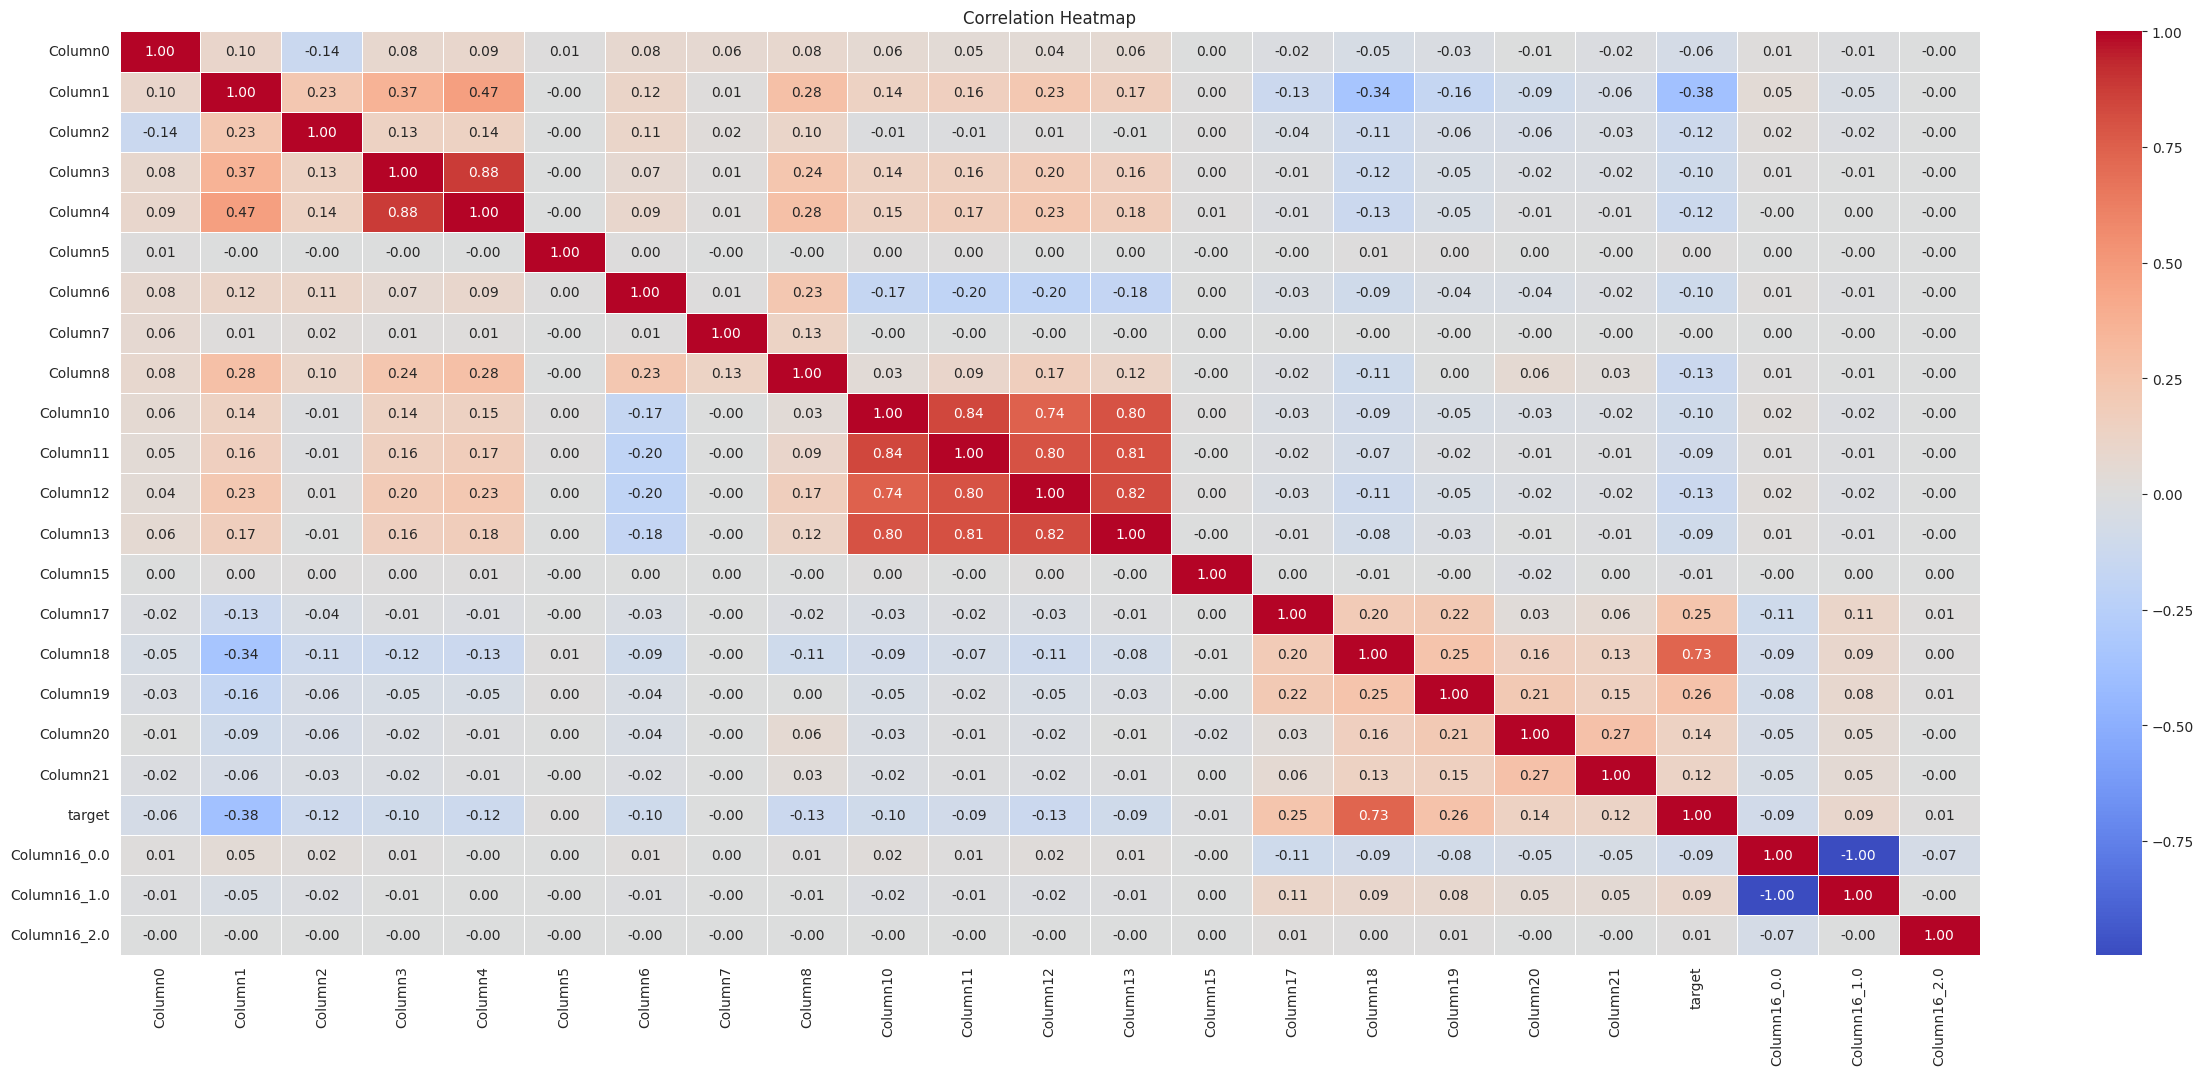

In [24]:
# Create a heatmap
plt.figure(figsize=(30, 12))  # Adjust the figure size as needed
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and show the plot
plt.title('Correlation Heatmap')

plt.show()


As you can see Column 10,11,12,13 are highly correlated, but they are categorical values.

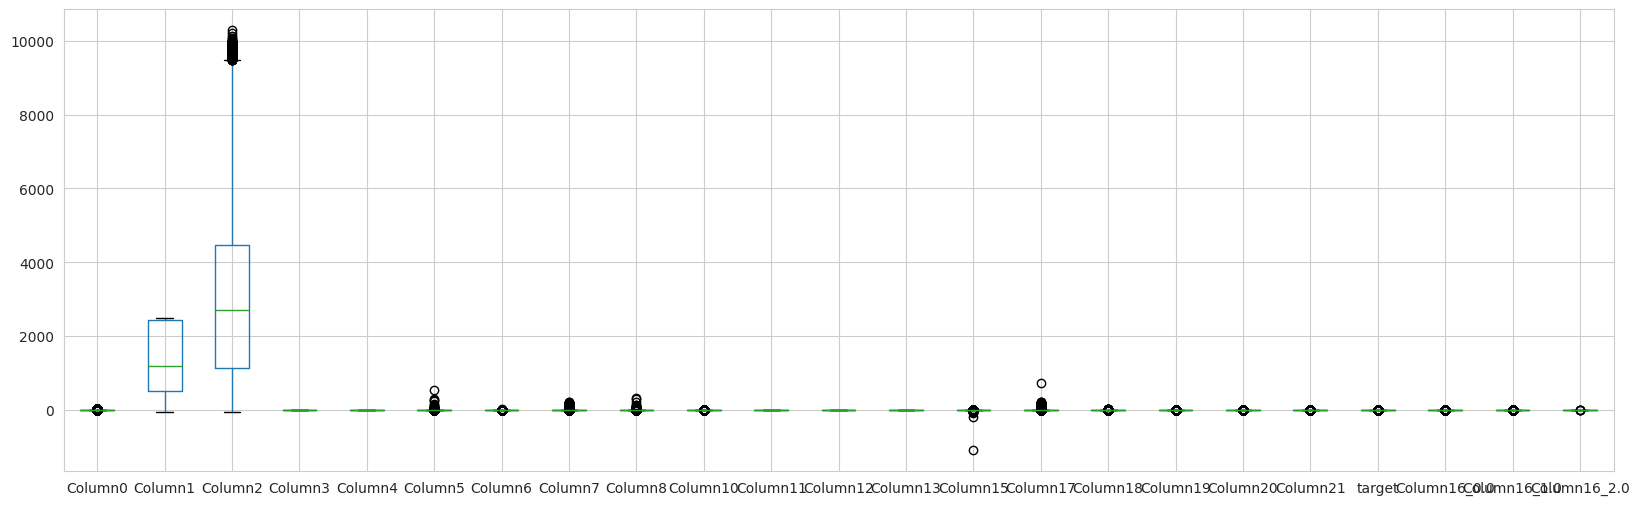

In [25]:
plt.figure(figsize=(20, 6))
boxplot = df1.boxplot()

Column2, Column5, Column8, Column15, Column17 have outliers, lets Zoom in two those columns

**TBD**
Discuss and implement how to handle outliers individually?

In [26]:
# Calculate quartiles
def boxplot_analysis(df, col, width=4, height=6, filter_out=False, apply_IQR=False, drawplot=True ):
    print(df[col].describe())
    quartiles = df[col].quantile([0.25, 0.5, 0.75])

    # Get the quartile values
    q1 = quartiles[0.25]
    median = quartiles[0.5]
    q3 = quartiles[0.75]

    # Calculate whisker positions (1.5 * IQR)
    iqr = q3 - q1
    lower_whisker = df[col].clip(lower=q1 - 1.5 * iqr).min()
    upper_whisker = df[col].clip(upper=q3 + 1.5 * iqr).max()

    if drawplot:
        plt.figure(figsize=(width, height))
        # Generate box plot for 'Values' column
        boxplot = df.boxplot(column=col)

        # Annotate the quartile values on the boxplot
        plt.text(1.1, q1, f'Q1: {q1}', horizontalalignment='center', verticalalignment='center')
        plt.text(1.1, median, f'Median: {median}', horizontalalignment='center', verticalalignment='center')
        plt.text(1.1, q3, f'Q3: {q3}', horizontalalignment='center', verticalalignment='center')

        # Annotate the whisker values on the boxplot
        plt.text(0.1, lower_whisker, f'Lower Whisker: {lower_whisker}', horizontalalignment='center', verticalalignment='center', color='purple')
        plt.text(0.1, upper_whisker, f'Upper Whisker: {upper_whisker}', horizontalalignment='center', verticalalignment='center', color='orange')

        # Show the plot with annotations
        plt.show()

    outliers_count = df[(df[col] < lower_whisker) | (df[col] > upper_whisker)][col].count()
    print('Percentage of outliers = ', 100*outliers_count/df[col].count())
    if filter_out:
        print('Filtering out the outliers .....')
        df = df[(df[col] >= lower_whisker) & (df[col] <= upper_whisker)]

    if apply_IQR:
        # Clip (cap) the values at the lower and upper bounds
        print("Capping the lower/upper outliers with boundary values ")
        df[col] = df[col].clip(lower=lower_whisker, upper=upper_whisker)

    return df

##### **Column2**

count    781282.000000
mean       2952.375478
std        2142.545299
min         -47.000000
25%        1131.000000
50%        2711.000000
75%        4474.000000
max       10290.000000
Name: Column2, dtype: float64


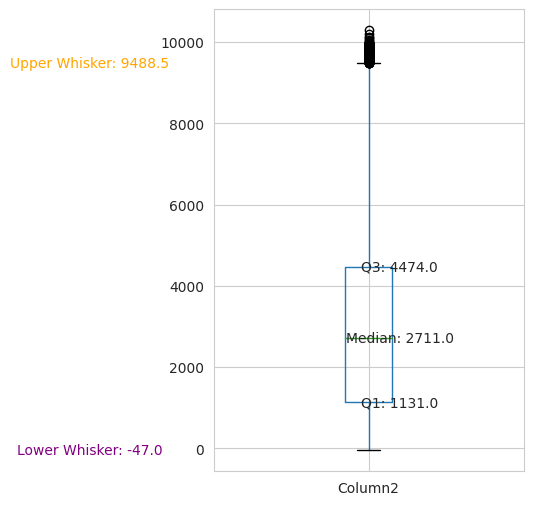

Percentage of outliers =  0.025598951466947913


In [27]:
df1 = boxplot_analysis(df1, 'Column2')

In [28]:
# we can remove these outliers as percentage is very small
df1 = boxplot_analysis(df1, 'Column2', filter_out=True, drawplot=False)

count    781282.000000
mean       2952.375478
std        2142.545299
min         -47.000000
25%        1131.000000
50%        2711.000000
75%        4474.000000
max       10290.000000
Name: Column2, dtype: float64
Percentage of outliers =  0.025598951466947913
Filtering out the outliers .....


##### **Column5**

count    617764.000000
mean         -0.000365
std           1.015411
min          -0.007469
25%          -0.007469
50%          -0.007469
75%          -0.007468
max         551.421127
Name: Column5, dtype: float64


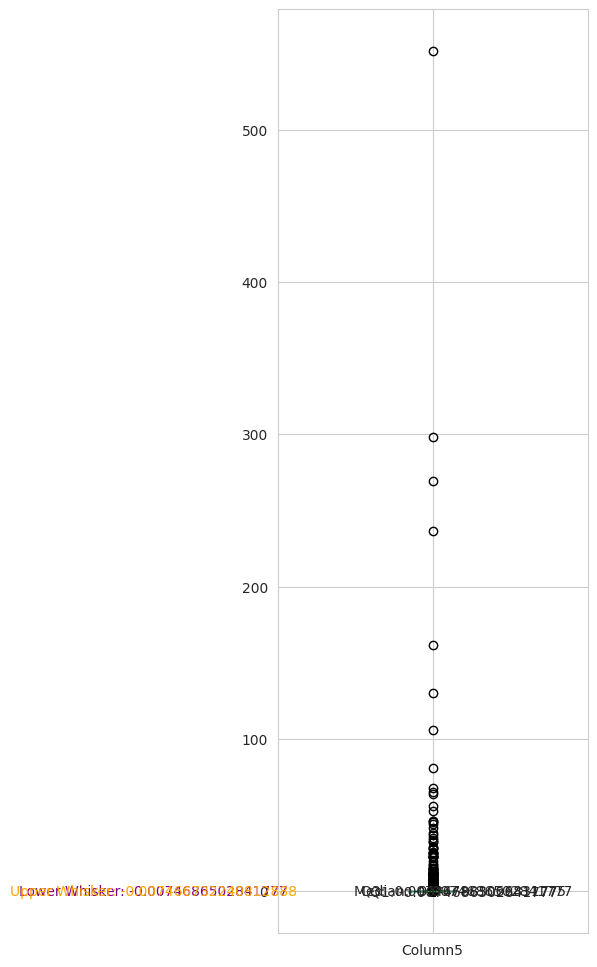

Percentage of outliers =  0.366806741733089


In [29]:
df1 = boxplot_analysis(df1, 'Column5', height=12)

In [30]:
# we can filter out the column5 outliers
df1 = boxplot_analysis(df1, 'Column5', filter_out=True, drawplot=False)

count    617764.000000
mean         -0.000365
std           1.015411
min          -0.007469
25%          -0.007469
50%          -0.007469
75%          -0.007468
max         551.421127
Name: Column5, dtype: float64
Percentage of outliers =  0.366806741733089
Filtering out the outliers .....


##### **Column8**

count    615498.000000
mean          0.196784
std           1.102393
min          -0.774979
25%          -0.774979
50%           0.332671
75%           0.745950
max         323.992484
Name: Column8, dtype: float64


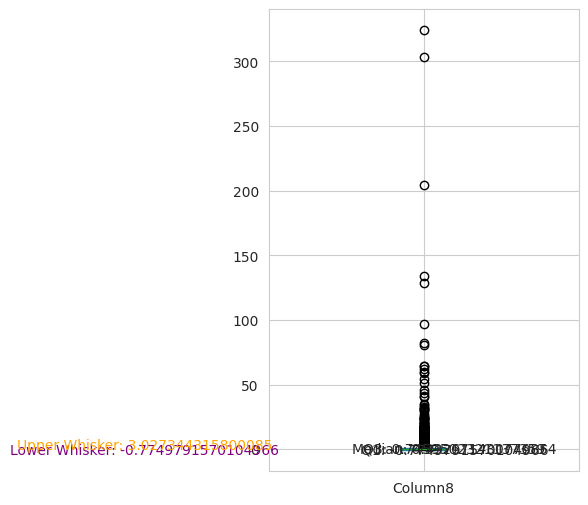

Percentage of outliers =  0.16539452605857372


In [31]:
df1 = boxplot_analysis(df1, 'Column8')

In [32]:
df1 = boxplot_analysis(df1, 'Column8', filter_out=True, drawplot=False)

count    615498.000000
mean          0.196784
std           1.102393
min          -0.774979
25%          -0.774979
50%           0.332671
75%           0.745950
max         323.992484
Name: Column8, dtype: float64
Percentage of outliers =  0.16539452605857372
Filtering out the outliers .....


##### **Column15**

count    607123.000000
mean          0.000401
std           1.406641
min       -1091.545904
25%           0.003390
50%           0.003390
75%           0.003390
max           0.012736
Name: Column15, dtype: float64


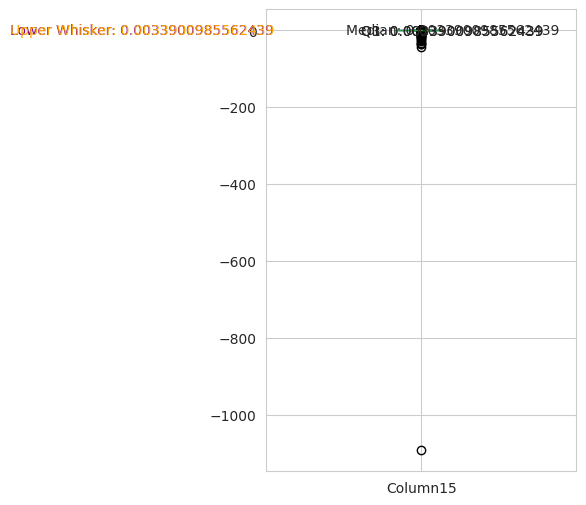

Percentage of outliers =  16.240201738362735


In [33]:
df1 = boxplot_analysis(df1, 'Column15')

In [34]:
# percenate is high, so we can cap the boundaries
df1 = boxplot_analysis(df1, 'Column15', apply_IQR=True, drawplot=False)

count    607123.000000
mean          0.000401
std           1.406641
min       -1091.545904
25%           0.003390
50%           0.003390
75%           0.003390
max           0.012736
Name: Column15, dtype: float64
Percentage of outliers =  16.240201738362735
Capping the lower/upper outliers with boundary values 


##### **Column17**

count    614480.000000
mean          0.316765
std           3.394021
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         728.000000
Name: Column17, dtype: float64


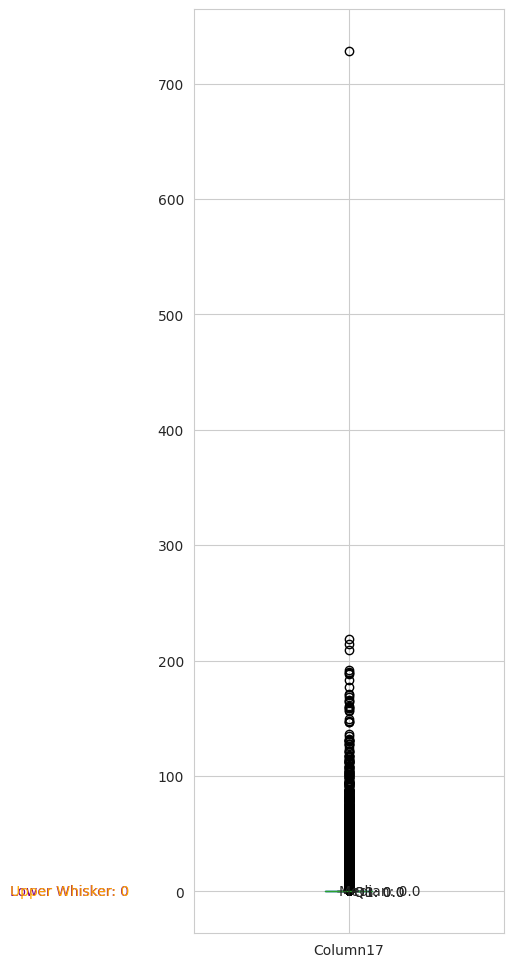

Percentage of outliers =  2.7662413748209866


In [35]:
df1 = boxplot_analysis(df1, 'Column17', height=12)

In [36]:
# percenate is high, so we can cap the boundaries
df1 = boxplot_analysis(df1, 'Column17', apply_IQR=True, drawplot=False)

count    614480.000000
mean          0.316765
std           3.394021
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         728.000000
Name: Column17, dtype: float64
Percentage of outliers =  2.7662413748209866
Capping the lower/upper outliers with boundary values 


In [37]:
# after applying all feature
df1.shape

(614480, 23)

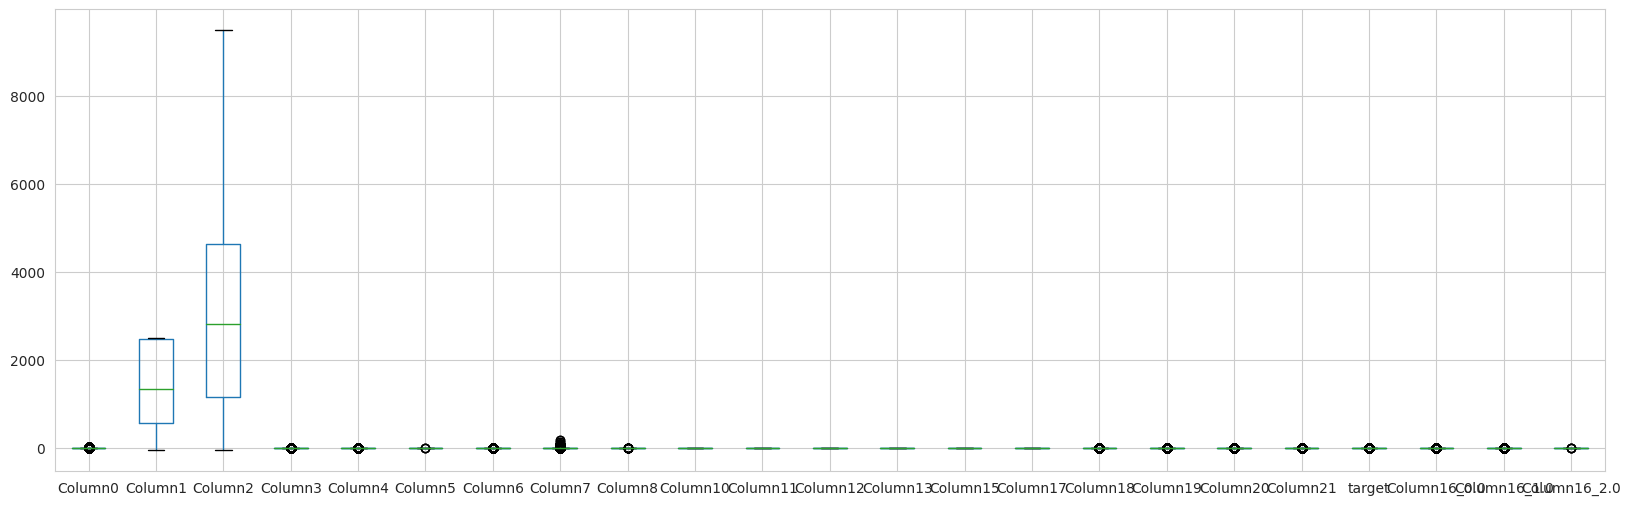

In [38]:
plt.figure(figsize=(20, 6))
boxplot = df1.boxplot()

#### Handling Null values in reduced dataset

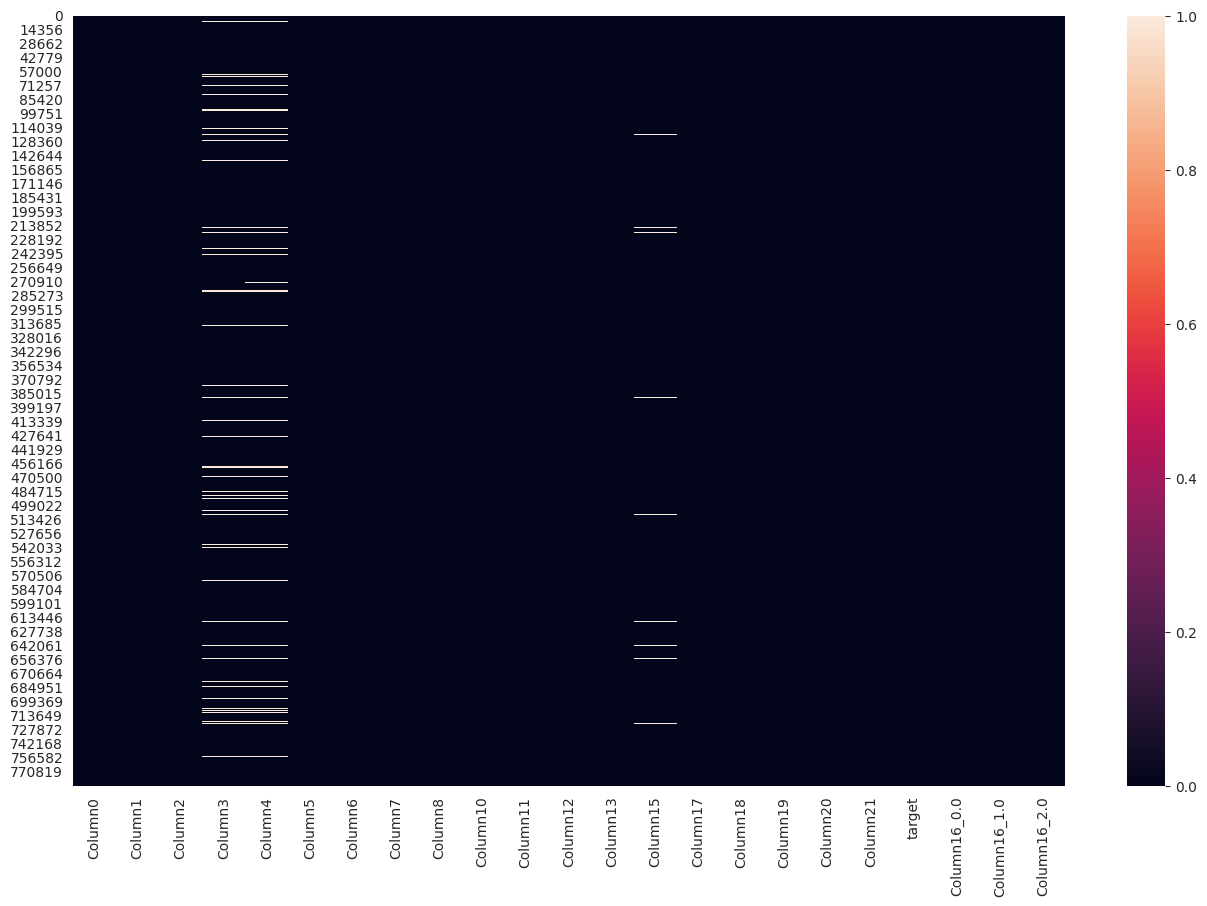

In [39]:
# Checking for null values in the updated dataframe
plt.figure(figsize=(16,10))
sns.heatmap(df1.isnull())
plt.show()

In [40]:
# Checking for Percentage of null values
a = (df1.isnull().sum() / df1.shape[0]) * 100
b = a[a > 0.00]
b = pd.DataFrame(b, columns = ['Percentage of null values'])
b.sort_values(by= ['Percentage of null values'], ascending=True)

,Percentage of null values
Column15,1.197272
Column3,5.128564
Column4,5.253548


In [41]:
# fillna with median for column 3,4 and 15

col3_median_for_na = df1['Column3'].median()
col4_median_for_na = df1['Column4'].median()
col15_median_for_na = df1['Column15'].median()

df1['Column3'].fillna(col3_median_for_na, inplace=True)
df1['Column4'].fillna(col4_median_for_na, inplace=True)
df1['Column15'].fillna(col15_median_for_na, inplace=True)

print(f" column 3 fill na value {col3_median_for_na}")
print(f" column 4 fill na value {col4_median_for_na}")
print(f" column 15 fill na value {col15_median_for_na}")

 column 3 fill na value 0.6781394378315789
 column 4 fill na value 0.7014034666794821
 column 15 fill na value 0.0033900985562439


In [42]:
# Checking again for Percentage of null values
a = (df1.isnull().sum() / df1.shape[0]) * 100
b = a[a > 0.00]
b = pd.DataFrame(b, columns = ['Percentage of null values'])
b.sort_values(by= ['Percentage of null values'], ascending=False)

,Percentage of null values


## Model Building

### Split data into training and testing set

#### Test Data

In [43]:
X = df1.loc[:, df1.columns != 'target']
y = df1['target']

In [44]:
# Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state = 2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((491584, 22), (491584,), (122896, 22), (122896,))

#### Validation Data

In [45]:
validation = pd.read_csv(TEST_DATASET_PATH)
print(validation.shape)
validation_target = pd.read_csv(TEST_DATASET_TARGET_PATH)
print(validation_target.shape)
validation = pd.merge(validation, validation_target, on='ID')
print(validation.shape)


(261712, 23)
(261712, 2)
(261712, 24)


In [46]:
# Dropping the columns not needed
validation.drop(['ID'], axis=1, inplace=True)
validation.shape

validation.drop(['Column9', 'Column14'], axis=1, inplace = True)

# One-hot encoding the 'Color' column
validation = pd.get_dummies(validation, columns=['Column16'])

# Align with the training data columns (fill missing with zeros)
validation = validation.reindex(columns=df1.columns, fill_value=0)

# fillna with median for column 3,4 and 15
validation['Column3'].fillna(col3_median_for_na, inplace=True)
validation['Column4'].fillna(col4_median_for_na, inplace=True)
validation['Column15'].fillna(col15_median_for_na, inplace=True)

print("Shape after:", validation.shape)


Shape after: (261712, 23)


In [47]:
# Checking again for Percentage of null values
a = (validation.isnull().sum() / validation.shape[0]) * 100
b = a[a > 0.00]
b = pd.DataFrame(b, columns = ['Percentage of null values'])
b.sort_values(by= ['Percentage of null values'], ascending=False)

,Percentage of null values
Column5,21.267271
Column6,0.471511
Column8,0.471511
Column0,0.000764


In [48]:
X_validate = validation.loc[:, validation.columns != 'target']
y_expected = validation['target']

#### Metrics Utility

|           | Predicted Positive | Predicted Negative |
|-----------|-------------------|-------------------|
| Actual Positive | True Positive (TP) | False Negative (FN) |
| Actual Negative | False Positive (FP) | True Negative (TN)   
 |

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

def print_model_metrics(y_expected, y_predicted, model_name=""):
    if model_name:
        print("\n************** {} ***********************".format(model_name))
    print("\n Accuracy Score : ", accuracy_score(y_expected, y_predicted))
    print('\nClassification Report :')
    print(classification_report(y_expected, y_predicted))


    # Compute the ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_expected, y_predicted)
    auc_score = roc_auc_score(y_expected, y_predicted)

    # Compute Precision-Recall curve for each model
    prec_xgb, recall_xgb, _ = precision_recall_curve(y_expected, y_predicted)

    # Plot the ROC curve
    plt.plot(recall_xgb, prec_xgb, label=f'Precision-Recall')
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate | Recall")
    plt.ylabel("True Positive Rate | Precision")
    plt.title("ROC Curve / PR curve")
    plt.legend()
    plt.show()





### Decision Tree

In [50]:
# Using DecisionTree as base model
giniDecisionTree = DecisionTreeClassifier(criterion='gini', random_state = 100,
                                          max_depth=3, class_weight = 'balanced', min_samples_leaf = 5)
giniDecisionTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [51]:
# Prediciton using DecisionTree
giniPred = giniDecisionTree.predict(x_test)
print('Training --> Accuracy Score: ', accuracy_score(y_test, giniPred))

Training --> Accuracy Score:  0.9702594063273011


In [52]:
# On GST test prediction
giniPred = giniDecisionTree.predict(X_validate)


Classification Report for DT:

************** Decision Tree ***********************

 Accuracy Score :  0.9667688145747998

Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    237034
           1       0.74      1.00      0.85     24678

    accuracy                           0.97    261712
   macro avg       0.87      0.98      0.92    261712
weighted avg       0.98      0.97      0.97    261712



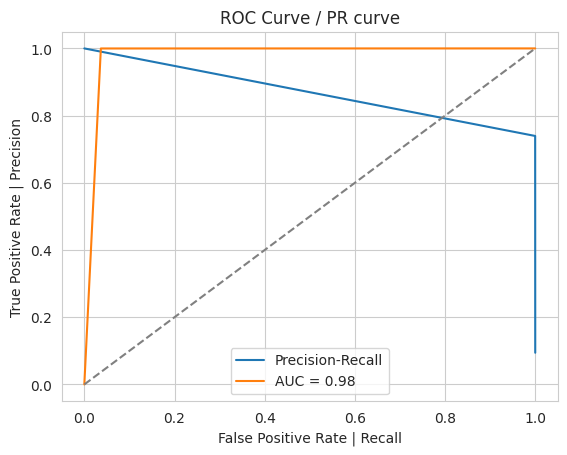

In [53]:
# Classification report for DT

print('Classification Report for DT:')
print_model_metrics(y_expected, giniPred, "Decision Tree")

### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [256],  # Number of trees in the forest
    'max_depth': [30],  # Maximum depth of each tree
    'min_samples_split': [5],  # Minimum samples to split an internal node
    'min_samples_leaf': [2],  # Minimum number of samples required at a leaf node
    'max_features': ['log2'],  # Number of features to consider for the best split
    'bootstrap': [True]  # Whether to use bootstrap samples
}

# # Initialize GridSearchCV with Random Forest and the hyperparameter grid
# grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid,
#                            cv=2, scoring='recall', n_jobs=-1, verbose=2)

# # Fit the model with grid search
# grid_search.fit(x_train, y_train)

# Initialize RandomizedSearchCV
randomized_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_grid,
                                       n_iter=50, cv=2, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)

randomized_search.fit(x_train, y_train)

# Print the best parameters and the corresponding accuracy
print(f"Best Parameters: {randomized_search.best_params_}")
print(f"Best Accuracy: {randomized_search.best_score_}")

# Step 7: Evaluate the model on the test set
best_rf = randomized_search.best_estimator_
y_pred = best_rf.predict(x_test)
print("Training : ")
print(classification_report(y_test, y_pred))



Fitting 2 folds for each of 1 candidates, totalling 2 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')  # You can change to 'median' or 'most_frequent'
X_imputed_validate = imputer.fit_transform(X_validate)

rf_prediction = best_rf.predict(X_imputed_validate)
print_model_metrics(y_expected, rf_prediction, model_name="Random Forest")

### CatBoost

In [56]:
# Create CatBoostClassifier object
CatBoost_clf = CatBoostClassifier(depth=8, learning_rate=0.05, iterations=512,
                                  silent=True, random_state=42,
                                  l2_leaf_reg=10,  # Regularization parameter
                                  class_weights=[0.1, 0.9]
                                  )

In [57]:

CatBoost_clf.fit(x_train, y_train,
                 eval_set = (x_test, y_test),
                 verbose = False)

In [58]:
# Prediction using CatBoost
cbr_prediction = CatBoost_clf.predict(x_test)
print('Training -- > Accuracy Score: ', accuracy_score(y_test, cbr_prediction))

Training -- > Accuracy Score:  0.975345007160526



************** CatBoost ***********************

 Accuracy Score :  0.9718621996698661

Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    237034
           1       0.77      1.00      0.87     24678

    accuracy                           0.97    261712
   macro avg       0.89      0.98      0.93    261712
weighted avg       0.98      0.97      0.97    261712



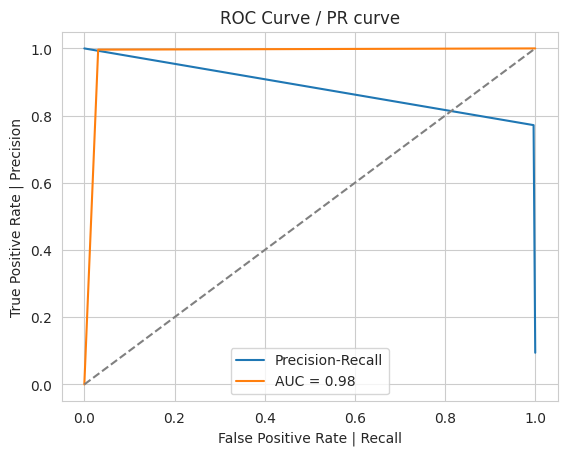

In [59]:
# Validating on GST test dataset
# Prediction using CatBoost
cbr_prediction = CatBoost_clf.predict(X_validate)
#  Classification report for CatBoost model
print_model_metrics(y_expected, cbr_prediction, model_name="CatBoost")

### XGBoost

In [60]:
# Create XGBClassifier object
XGB_clf = XGBClassifier(n_estimators=256, max_depth=8,
                        learning_rate=0.1, random_state=42,
                        class_weights=[0.08, 0.92])

In [61]:
# Fit on training set
XGB_clf.fit(x_train, y_train,
            eval_set = [(x_train, y_train), (x_test, y_test)],
            verbose = False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weights=[0.08, 0.92], colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=256, n_jobs=None,
              num_parallel_tree=None, ...)

In [62]:
# Prediction using XGBClassifier
XGB_prediction = XGB_clf.predict(x_test)
print('Training --> Accuracy Score: ', accuracy_score(y_test, XGB_prediction))

Training --> Accuracy Score:  0.9807316755630777



************** XgBoost ***********************

 Accuracy Score :  0.9770511096166778

Classification Report :
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.84      0.93      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.96      0.94    261712
weighted avg       0.98      0.98      0.98    261712



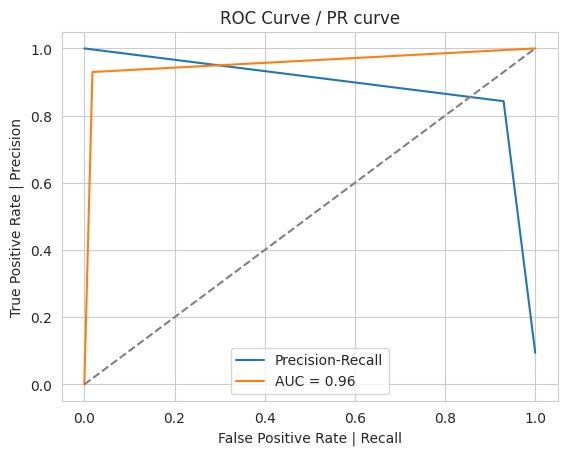

In [63]:
xgb_prediction = XGB_clf.predict(X_validate)
print_model_metrics(y_expected, xgb_prediction, "XgBoost")

### LightGBM

In [64]:
# Create LGBMClassifier object

# Define the ratio of negative to positive samples
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

LGBM_clf = LGBMClassifier(n_estimators=1024, max_depth=8, learning_rate=0.1,
                          random_state=42,
                        #   scale_pos_weight=scale_pos_weight,
                        #   is_unbalance=True
                          )

In [65]:
# Fit on training set
LGBM_clf.fit(x_train, y_train,
             eval_set = [(x_train, y_train), (x_test, y_test)])

[LightGBM] [Info] Number of positive: 43560, number of negative: 448024
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1670
[LightGBM] [Info] Number of data points in the train set: 491584, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.088612 -> initscore=-2.330708
[LightGBM] [Info] Start training from score -2.330708


LGBMClassifier(max_depth=8, n_estimators=1024, random_state=42)

In [66]:
# Prediction using LGBMClassifier
LGBM_prediction = LGBM_clf.predict(x_test)
print('Training --> Accuracy Score: ', accuracy_score(y_test, LGBM_prediction))

Training --> Accuracy Score:  0.9802190469990887



************** LGBM ***********************

 Accuracy Score :  0.9754883230421226

Classification Report :
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.91      0.87     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.94      0.93    261712
weighted avg       0.98      0.98      0.98    261712



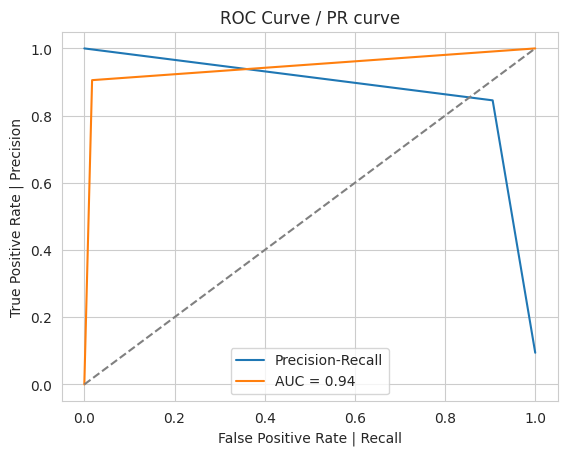

In [68]:
lgbm_prediction = LGBM_clf.predict(X_validate)
print_model_metrics(y_expected, lgbm_prediction, "LGBM")


************** Ensemble Majority Model ***********************

 Accuracy Score :  0.9768944488598154

Classification Report :
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.83      0.94      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.91      0.96      0.94    261712
weighted avg       0.98      0.98      0.98    261712



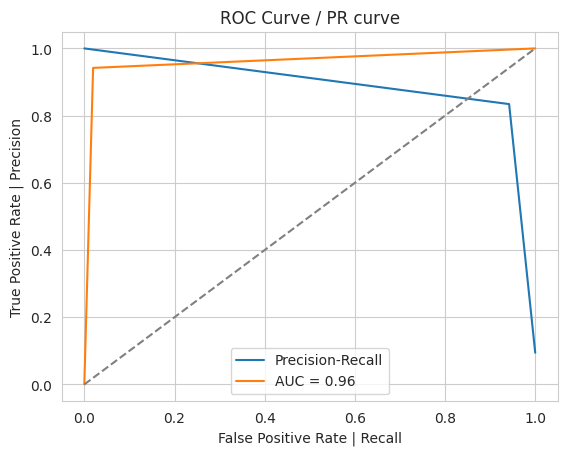

In [69]:
# Averaging the predictions (Ensemble)
y_pred_avg = (cbr_prediction + xgb_prediction + lgbm_prediction) / 3

# Combine predictions using majority voting
y_pred_final = np.round((cbr_prediction + xgb_prediction + lgbm_prediction) / 3).astype(int)


# Convert averaged probabilities to final class predictions
# y_pred_final = np.argmax(y_pred_avg, axis=1)

# Evaluate ensemble model accuracy
print_model_metrics(y_expected, y_pred_final, 'Ensemble Majority Model')


In [70]:
from sklearn.ensemble import VotingClassifier

# Create the Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('xgb', XGB_clf),
    ('cat', CatBoost_clf),
    ('lgbm', LGBM_clf)
], voting='soft')  # Soft voting averages the predicted probabilities

# Train the voting classifier
voting_clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = voting_clf.predict(x_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Training -----> Accuracy of Voting Classifier: {accuracy:.2f}")

[LightGBM] [Info] Number of positive: 43560, number of negative: 448024
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1670
[LightGBM] [Info] Number of data points in the train set: 491584, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.088612 -> initscore=-2.330708
[LightGBM] [Info] Start training from score -2.330708
Training -----> Accuracy of Voting Classifier: 0.98



************** Soft Voting Model ***********************

 Accuracy Score :  0.9766575472274867

Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    237034
           1       0.82      0.97      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.91      0.97      0.94    261712
weighted avg       0.98      0.98      0.98    261712



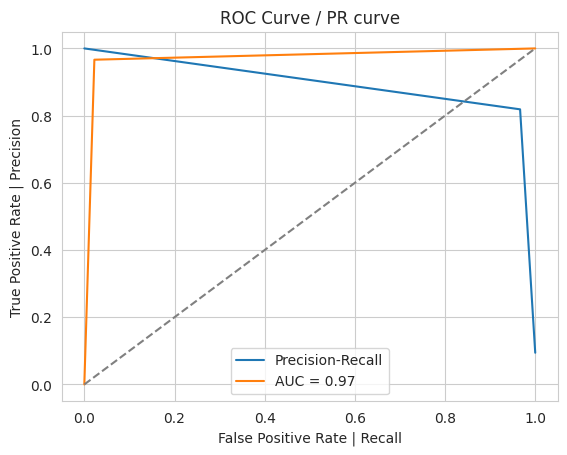

In [71]:
soft_voting_prediction = voting_clf.predict(X_validate)
# Evaluate ensemble model accuracy
print_model_metrics(y_expected, soft_voting_prediction, 'Soft Voting Model')

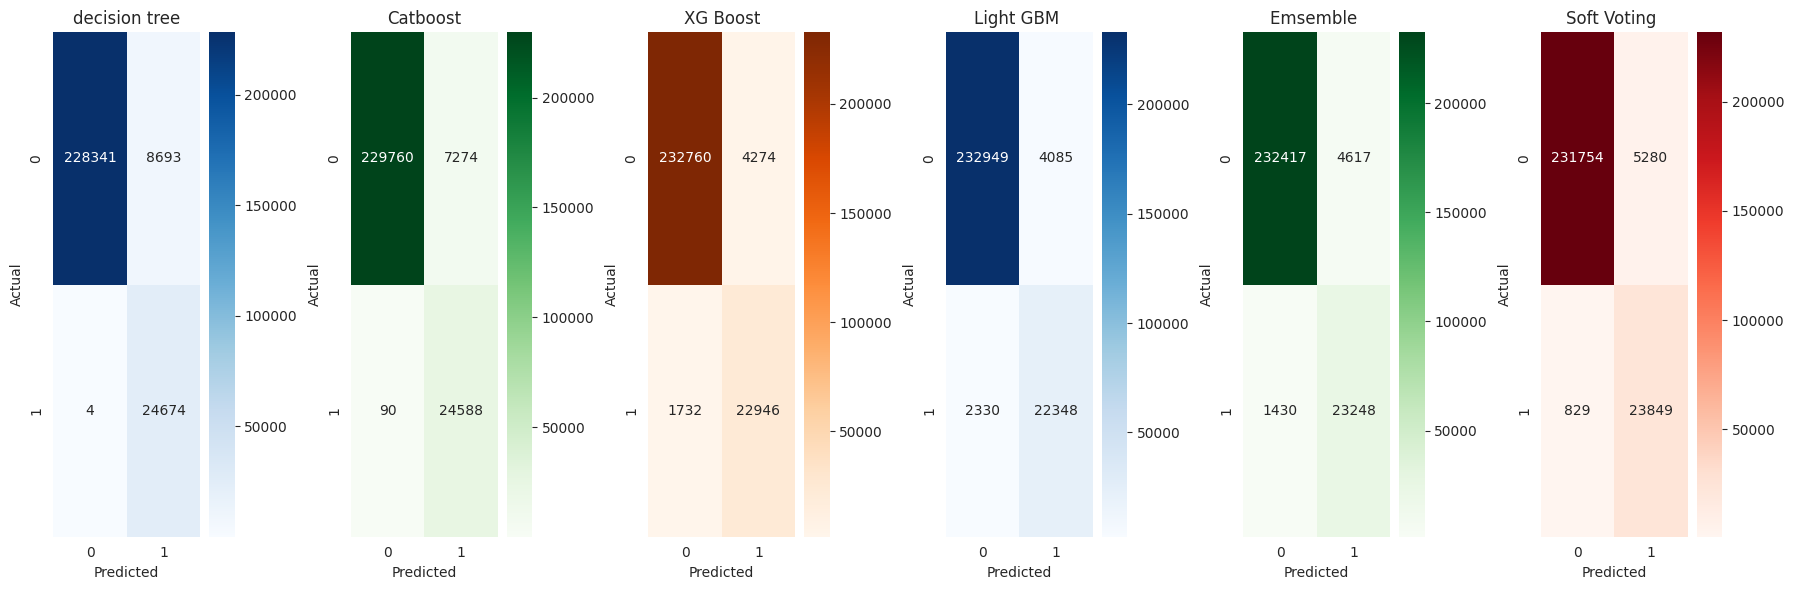

In [72]:
from sklearn.metrics import confusion_matrix

# Create confusion matrices
cm_dt = confusion_matrix(y_expected, giniPred)
cm_cbr = confusion_matrix(y_expected, cbr_prediction)
cm_xgb = confusion_matrix(y_expected, xgb_prediction)
cm_lgbm = confusion_matrix(y_expected, lgbm_prediction)
cm_ensemble = confusion_matrix(y_expected, y_pred_final)
cm_soft_ensemble = confusion_matrix(y_expected, soft_voting_prediction)

# Plot the confusion matrices
fig, axes = plt.subplots(1, 6, figsize=(18, 6))

sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("decision tree")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_cbr, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Catboost")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Oranges", ax=axes[2])
axes[2].set_title("XG Boost")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

sns.heatmap(cm_lgbm, annot=True, fmt="d", cmap="Blues", ax=axes[3])
axes[3].set_title("Light GBM ")
axes[3].set_xlabel("Predicted")
axes[3].set_ylabel("Actual")

sns.heatmap(cm_ensemble, annot=True, fmt="d", cmap="Greens", ax=axes[4])
axes[4].set_title("Emsemble ")
axes[4].set_xlabel("Predicted")
axes[4].set_ylabel("Actual")

sns.heatmap(cm_soft_ensemble, annot=True, fmt="d", cmap="Reds", ax=axes[5])
axes[5].set_title("Soft Voting ")
axes[5].set_xlabel("Predicted")
axes[5].set_ylabel("Actual")

# Show plot
plt.tight_layout()
plt.show()


In [73]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

def plot_metrics_curve(X_test, y_test, xgb_clf, cat_clf, lgbm_clf):
    y_probs_xgb = xgb_clf.predict_proba(X_test)[:, 1]  # Probabilities for positive class
    y_probs_cat = cat_clf.predict_proba(X_test)[:, 1]
    y_probs_lgbm = lgbm_clf.predict_proba(X_test)[:, 1]

    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_probs_xgb)
    fpr_cat, tpr_cat, _ = roc_curve(y_test, y_probs_cat)
    fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_probs_lgbm)

    auc_xgb = auc(fpr_xgb, tpr_xgb)
    auc_cat = auc(fpr_cat, tpr_cat)
    auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

    # Step 5: Plot ROC Curves
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.4f})')
    plt.plot(fpr_cat, tpr_cat, label=f'CatBoost (AUC = {auc_cat:.4f})')
    plt.plot(fpr_lgbm, tpr_lgbm, label=f'LGBM (AUC = {auc_lgbm:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random chance line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend(loc='lower right')
    plt.show()

    # Step 6: Compute Precision-Recall curve for each model
    prec_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_probs_xgb)
    prec_cat, recall_cat, _ = precision_recall_curve(y_test, y_probs_cat)
    prec_lgbm, recall_lgbm, _ = precision_recall_curve(y_test, y_probs_lgbm)

    # Step 7: Plot Precision-Recall Curves
    plt.figure(figsize=(8, 6))
    plt.plot(recall_xgb, prec_xgb, label=f'XGBoost')
    plt.plot(recall_cat, prec_cat, label=f'CatBoost')
    plt.plot(recall_lgbm, prec_lgbm, label=f'LGBM')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve Comparison')
    plt.legend(loc='lower left')
    plt.show()


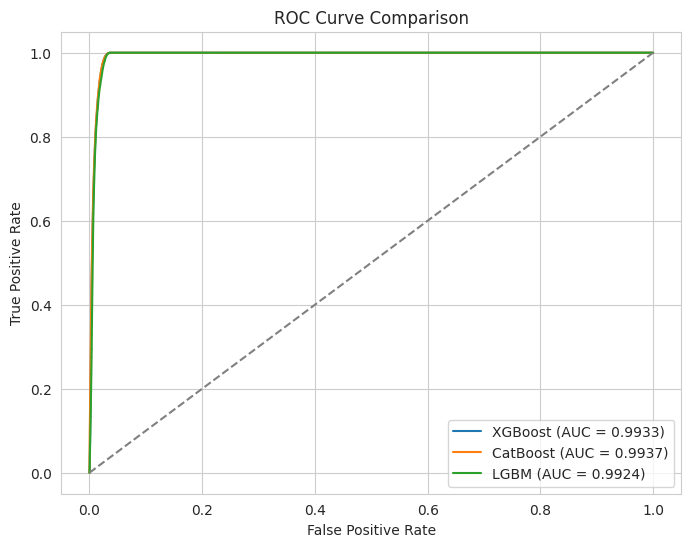

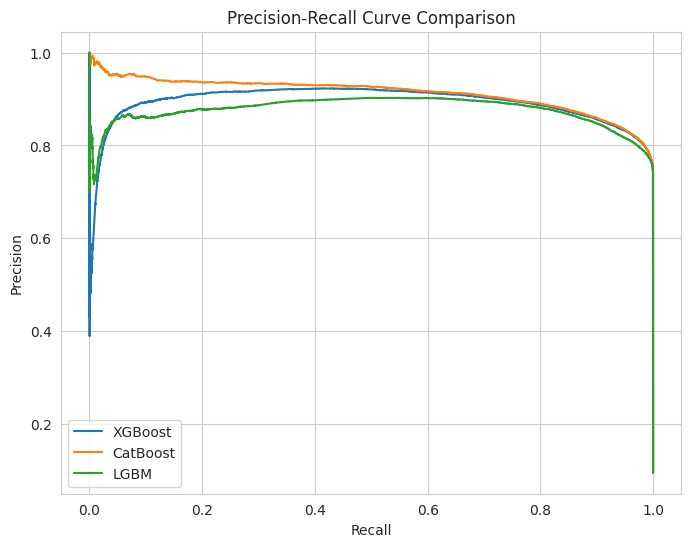

In [74]:
plot_metrics_curve(X_validate, y_expected, XGB_clf, CatBoost_clf, LGBM_clf)

##Model Selection

Here are the findings:


*   Decision Tree and Random forest model trials indicate that - tree based models do well for this classification scenarios. While they show good metrics, it can still be improved further by using boosting algorthim based models
*   Catboost, Xg Boost and LGBM models do very well. Since the data is heavily unbalanced, it makes sense to use a voting classifier based on these 3 boosting models.
*   It can be seen that Voting classifier does very well, avoids overfitting as expected. It can be further improved by fine tuning underlying models.

**Recommended model** :  Voting Classifer with CatBoost, XG Boost and Light GBM.




